# Single-ancilla ground state preparation via Lindbladians

References:
- Zhiyan Ding, Chi-Fang Chen and Lin Lin  
  Single-ancilla ground state preparation:
  [arXiv:2308.15676 [quant-ph]](https://arxiv.org/abs/2308.15676)

In [2]:
import numpy as np
from scipy.linalg import sqrtm, cosm, sinm, expm
import matplotlib.pyplot as plt
import scipy.linalg as la
from qutip import *
import math

/usr/lib/python3/dist-packages/pythran/tables.py:4520: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, method):
/usr/lib/python3/dist-packages/pythran/tables.py:4553: FutureWarning: In the future `np.bytes` will be defined as the corresponding NumPy scalar.
  obj = getattr(themodule, elem)


In [3]:
import numpy as np

ket_0 = np.array([[1.0, 0.0]])
ket_1 = np.array([[0.0, 1.0]])

print("|ket_0><ket_0| = \n", np.kron(ket_0.conj().T, ket_0))
print("\n")
print("|ket_0> o |ket_0> =\n", np.kron(ket_0, ket_0))
print("\n")
print("|ket_1> o |ket_0> =\n", np.kron(ket_1, ket_0))

I = np.array([[1.0, 0.0], [0.0, 1.0]])
X = np.array([[0.0, 1.0], [1.0, 0.0]])
Y = np.array([[0.0, -1j], [1j, 0.0]])
Z = np.array([[1.0, 0.0], [0.0, -1.0]])

creation_op = (X - (1j * Y)) / 2
annihilation_op = (X + (1j * Y)) / 2

def Pauli_array(op, poz, size):
	"""Pauli operator on custom system

	Args:
		op (np.array): type of operator defined as numpy array, i.e. X, Y, Z
		poz (int): position of the system the operator acts on, indexing starting from 0
		size (int): size of the total system

	Returns:
		_type_: _description_
	"""
	ret = 1
	if poz > size:
		return ret
	for i in np.arange(1, size+1, 1):
		if i == poz:
			ret = np.kron(ret, op)
		else:
			ret = np.kron(ret, I)
	return ret

print(Pauli_array(Z, 1, 4))

annihilation_tmp = np.kron((X + (1j * Y)) / 2, I)

# Find ancilla number based on Jump operators
def nr_of_ancilla(num_of_jump):
	"""Find the number of minimum ancillary qubits for the desired dimension

	Args:
		num_of_jump (int): Dimension of the system

	Returns:
		int: Nr of ancillary system
	"""
	if num_of_jump <= 0:
		return 0
	power = num_of_jump
	tmp = np.power(2, power)

	power = power - 1
	while (num_of_jump + 1) <= tmp:

		tmp = np.power(2, power)

	return power + 1


print(nr_of_ancilla(2))

|ket_0><ket_0| = 
 [[1. 0.]
 [0. 0.]]


|ket_0> o |ket_0> =
 [[1. 0. 0. 0.]]


|ket_1> o |ket_0> =
 [[0. 0. 1. 0.]]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. -0. -0. -0. -0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0. -1. -0. -0. -0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -1. -0. -0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -1. -0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -1. -0. -0. -0.]
 [ 0.  0.  0.

## TFIM damping model, time independent Hamiltonian

In [23]:
#TFIM model
import matplotlib.pyplot as plt
import numpy as np


T = 10 * np.pi  						# Final time
dt = 0.1  								# Time step
time_vec = np.arange(0, T, dt)			# Time vector to simulate on
taylor_aprox_order = 5					# Taylor approximation used for simulating exp(-i*sqrt*(dt)*H_tilde)

g = 1 									# Couppling coefficient
gamma = 0.1 							# Damping parameter

system_size = 2  						# Hamiltonian system size
system_size_dim = np.power(2, system_size)


J = system_size  						# Nr of jump operators is equal to the number of lattice elements


In [5]:
# Utility function, system and constants
import numpy as np

def H_op():
    """Time independent TFIM model

    Args:
            t (float): time stamp

    Returns:
            Qobj: Hamiltonian in the requested time
    """
    H = np.zeros((system_size_dim, system_size_dim))
    if system_size > 1:
        for i in np.arange(1, system_size, 1):
            H = H - Pauli_array(Z, i, system_size) @ Pauli_array(Z, i+1, system_size)
        H = H - Pauli_array(Z, system_size, system_size) @ Pauli_array(Z, 1, system_size)
    for i in np.arange(1, system_size+1, 1):
        H = H - g * Pauli_array(X, i, system_size)
    return Qobj(H)


def V_damping(i, t):
    """Damping operators

    Args:
        i (int): Jump operator number
        t (float): Time stamp

    Returns:
        Qobj: Requested jump operator at specified time
    """
    if i == 0:
        return Qobj(-1j*H_op()-0.5*sum_of_V_dag_V(0))
    if i >= 1 and i <= system_size_dim:
        return Qobj(np.sqrt(gamma)*(Pauli_array(X, i, system_size) - 1j*Pauli_array(Y, i, system_size)))
    return 0


def outer_prod(left_poz, right_poz, size):
    """Outer product of position i and j: |i><j|

    Args:
        left_poz (int): Position of 1 in ket vector
        right_poz (int): Position of 1 in the bra vector
        size (int): Size of the overall system

    Returns:
        np.array: Requested outer product
    """
    psi_ket = np.array([np.full(size, 0)])
    psi_ket[:, left_poz] = 1
    psi_bra = np.array([np.full(size, 0)])
    psi_bra[:, right_poz] = 1
    return Qobj(psi_ket.conjugate().T @ psi_bra)


def H_op_derivative():
    """Time derivative of periodic Hamiltonian

    Args:
        t (float): time stamp

    Returns:
        np.array: The drived Hamiltonian n requested time stamp
    """
    return Qobj(np.zeros((system_size_dim, system_size_dim)))


def V_damping_derivative(i, t):
    """Time derivative of jump operators

    Args:
        i (int): Nr of jump operator
        t (float): Time stamp

    Returns:
        Qobj: Time derivative of the selected jump operator
    """
    return Qobj(np.zeros((system_size_dim, system_size_dim)))


def sum_of_V_dag_V(t):
    """Summation of jump operators

    Args:
        t (float): Time stamp

    Returns:
        Qobj: Sum of all jump operators
    """
    sum = 0
    for j in np.arange(1, J+1 , 1):
        sum = sum + V_damping(j, 0).full().conj().T @ V_damping(j, 0).full()
    return Qobj(sum)


def commute(op1, op2):
    """Commuting operator

    Args:
        op1 (np.array): Operator 1
        op2 (np.array): Operator 2

    Returns:
        np.array: [op1, op2]
    """
    return op1 @ op2 - op2 @ op1


def anti_commute(op1, op2):
    """Anti-commuting operator

    Args:
        op1 (np.array): Operator 1
        op2 (np.array): Operator 2

    Returns:
        np.array: {op1, op2}
    """
    return op1 @ op2 + op1 @ op2


# First order simulation
def H_tilde_first_order(t):
    r"""Form of H tilde:
    H =
    sqrt(dt)H   |  V_1^{\dag}   |   V_2^{\dag}  |       0
        V_1     |       0       |       0       |       0
        V_2     |       0       |       0       |       0
        0       |       0       |       0       |       0

        Args:
        t (float): time stamp
    """
    sum = Qobj(
        np.kron(outer_prod(0, 0, ancilla_dim).full(), (np.sqrt(dt) * H_op()).full())
    )
    # First Row
    for j in np.arange(1, J + 1, 1):
        sum = sum + Qobj(
            np.kron(
                outer_prod(0, j, ancilla_dim).full(),
                V_damping(j, t).conj().trans().full(),
            )
        )

    # First Column
    for j in np.arange(1, J + 1, 1):
        sum = sum + Qobj(
            np.kron(outer_prod(j, 0, ancilla_dim).full(), V_damping(j, t).full())
        )

    return Qobj(
        sum, dims=[[ancilla_dim, system_size_dim], [ancilla_dim, system_size_dim]]
    )


def H_tilde_second_order(t):
    """Second order approximation fo H tilde
    https://arxiv.org/pdf/2311.15533 page 27 equation B10

    Args:
        t (float): time stamp
    """

    sum_tmp = np.sqrt(dt) * (H_op().full()) + np.power(dt, 3 / 2) * (
        0.5 * H_op_derivative().full()
        - 1 / 12 * anti_commute(H_op().full(), sum_of_V_dag_V(t).full())
    )
    sum = Qobj(np.kron(outer_prod(0, 0, ancilla_dim).full(), sum_tmp))

    for j in np.arange(1, J + 1, 1):
        sum_tmp = V_damping(j, t).full() + dt / 2 * (
            anti_commute(V_damping(j, t).full(), V_damping(0, t).full())
            + V_damping_derivative(j, t).full()
            + 1 / 6 * V_damping(j, t).full() @ sum_of_V_dag_V(t).full()
            + 1j / 2 * V_damping(j, t).full() @ H_op().full()
        )
        sum = (
            sum
            + Qobj(np.kron(outer_prod(j, 0, ancilla_dim).full(), sum_tmp))
            + Qobj(np.kron(outer_prod(0, j, ancilla_dim).full(), sum_tmp.conj().T))
        )

    for j in np.arange(1, J + 1, 1):
        sum_tmp = (
            dt
            / np.sqrt(12)
            * (
                commute(V_damping(0, t).full(), V_damping(j, t).full())
                - V_damping_derivative(j, t).full()
            )
        )
        sum = (
            sum
            + Qobj(np.kron(outer_prod(j + J, 0, ancilla_dim).full(), sum_tmp))
            + Qobj(np.kron(outer_prod(0, j + J, ancilla_dim).full(), sum_tmp.conj().T))
        )

    for j in np.arange(1, J + 1, 1):
        for k in np.arange(1, J + 1, 1):
            for l in np.arange(1, J + 1, 1):
                sum_tmp = (
                    dt
                    / np.sqrt(6)
                    * V_damping(j, t).full()
                    @ V_damping(k, t).full()
                    @ V_damping(l, t).full()
                )
                sum = (
                    sum
                    + Qobj(
                        np.kron(
                            outer_prod(
                                j + k * J + l * J * J - J * J + J, 0, ancilla_dim
                            ).full(),
                            sum_tmp,
                        )
                    )
                    + Qobj(
                        np.kron(
                            outer_prod(
                                0, j + k * J + l * J * J - J * J + J, ancilla_dim
                            ).full(),
                            sum_tmp.conj().T,
                        )
                    )
                )

    for j in np.arange(1, J + 1, 1):
        for k in np.arange(1, J + 1, 1):
            sum_tmp = np.sqrt(dt / 2) * V_damping(j, t).full() @ V_damping(k, t).full()
            sum = (
                sum
                + Qobj(
                    np.kron(
                        outer_prod(j + k * J + J * J * J + J, 0, ancilla_dim).full(),
                        sum_tmp,
                    )
                )
                + Qobj(
                    np.kron(
                        outer_prod(0, j + k * J + J * J * J + J, ancilla_dim).full(),
                        sum_tmp.conj().T,
                    )
                )
            )

    return Qobj(
        sum, dims=[[ancilla_dim, system_size_dim], [ancilla_dim, system_size_dim]]
    )



In [19]:
#   Inital states and emasurements
eigenValues, eigenVectors = la.eig(H_op().full())
idx = eigenValues.argsort()
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[idx]

psi_ground = np.matrix(eigenVectors[0].astype(float))
psi_0 = np.matrix(eigenVectors[-1].astype(float))

rho_ground = Qobj(psi_ground.conj().T @ psi_ground)
rho_0 = Qobj(psi_0.conj().T @ psi_0)

/tmp/ipykernel_3825/767689400.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_ground = np.matrix(eigenVectors[0].astype(float))
/tmp/ipykernel_3825/767689400.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_0 = np.matrix(eigenVectors[-1].astype(float))


### Exact simulation


/home/robi/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


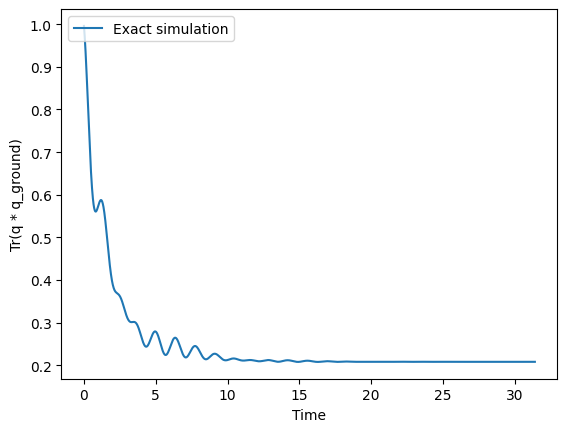

In [20]:
import matplotlib.pyplot as plt

T = 10 * np.pi  						# Final time
dt = 0.01  								# Time step
time_vec = np.arange(0, T, dt)			# Time vector to simulate on

rho = rho_0
exact_trace_sigmaZ_rho = []
for t in time_vec:
    sum = Qobj(np.zeros((system_size_dim, system_size_dim)))
    for j in np.arange(1, J + 1, 1):
        # Simple part
        sum = sum + V_damping(j, t) @ rho @ V_damping(j, t).conj().trans()
        # Anti-commuting part
        sum = sum - 0.5 * (
            V_damping(j, t).conj().trans() @ V_damping(j, t) @ rho
            + rho @ V_damping(j, t).conj().trans() @ V_damping(j, t)
        )
    delta_rho = -1j * (H_op() @ rho - rho @ H_op()) + sum
    rho = rho + dt * delta_rho
    exact_trace_sigmaZ_rho.append((rho @ rho_0).tr())

plt.figure()
plt.xlabel("Time")
plt.ylabel("Tr(q * q_ground)")
plt.plot(time_vec, exact_trace_sigmaZ_rho, label="Exact simulation")
plt.legend(loc="upper left")

### First order approximation

/home/robi/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


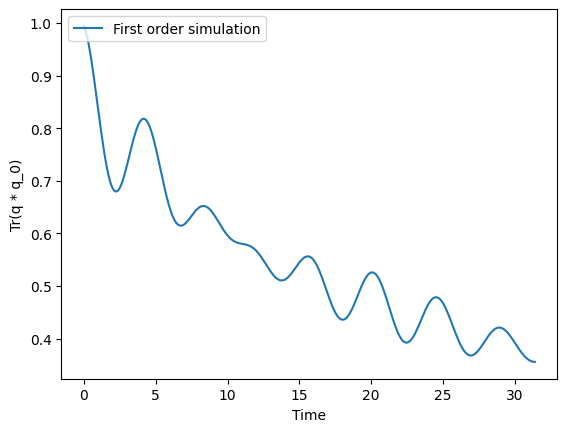

In [26]:
import math
import numpy as np

ancilla = 2  							# Ancillary system size
ancilla_dim = np.power(2, ancilla)
total_system_size = system_size + ancilla 		# Total system size
total_system_size_dim = np.power(2, total_system_size)

# First order scheme
psi_ancilla = 1
for i in range(ancilla):
    psi_ancilla = np.kron(psi_ancilla, ket_0)

rho_ancilla = Qobj(psi_ancilla.conj().T @ psi_ancilla)

rho = rho_0
first_order_trace_sigmaZ_rho = []
for t in time_vec:
    # Extended system, zero initialized ancilla + hamiltonian system
    system = Qobj(tensor(rho_ancilla, rho))
    # First element of taylor approximation, I
    taylor_aprox = Qobj(
        qeye(np.power(2, total_system_size)),
        dims=[[ancilla_dim, system_size_dim], [ancilla_dim, system_size_dim]],
    )
    # Custom size Taylor approximation
    for i in np.arange(1, taylor_aprox_order, 1):
        tmp = H_tilde_first_order(t)
        for _ in np.arange(1, i, 1):
            tmp = tmp @ H_tilde_first_order(t)
        taylor_aprox = taylor_aprox + np.power(-1j * dt, i) / math.factorial(i) * tmp

    left_tmp = taylor_aprox
    rigth_tmp = taylor_aprox.conj().trans()
    evolved_system = left_tmp @ system @ rigth_tmp
    rho = evolved_system.ptrace(1)
    first_order_trace_sigmaZ_rho.append((rho @ rho_0).tr())

plt.figure()
plt.xlabel("Time")
plt.ylabel("Tr(q * q_0)")
plt.plot(time_vec, first_order_trace_sigmaZ_rho, label="First order simulation")
plt.legend(loc="upper left")

### Second order approximation

 0.0
 0.1
 0.2
 0.30000000000000004
 0.4
 0.5
 0.6000000000000001
 0.7000000000000001
 0.8
 0.9
 1.0
 1.1
 1.2000000000000002
 1.3
 1.4000000000000001
 1.5
 1.6
 1.7000000000000002
 1.8
 1.9000000000000001
 2.0
 2.1
 2.2
 2.3000000000000003
 2.4000000000000004
 2.5
 2.6
 2.7
 2.8000000000000003
 2.9000000000000004
 3.0
 3.1
 3.2
 3.3000000000000003
 3.4000000000000004
 3.5
 3.6
 3.7
 3.8000000000000003
 3.9000000000000004
 4.0
 4.1000000000000005
 4.2
 4.3
 4.4
 4.5
 4.6000000000000005
 4.7
 4.800000000000001
 4.9
 5.0
 5.1000000000000005
 5.2
 5.300000000000001
 5.4
 5.5
 5.6000000000000005
 5.7
 5.800000000000001
 5.9
 6.0
 6.1000000000000005
 6.2
 6.300000000000001
 6.4
 6.5
 6.6000000000000005
 6.7
 6.800000000000001
 6.9
 7.0
 7.1000000000000005
 7.2
 7.300000000000001
 7.4
 7.5
 7.6000000000000005
 7.7
 7.800000000000001
 7.9
 8.0
 8.1
 8.200000000000001
 8.3
 8.4
 8.5
 8.6
 8.700000000000001


/home/robi/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


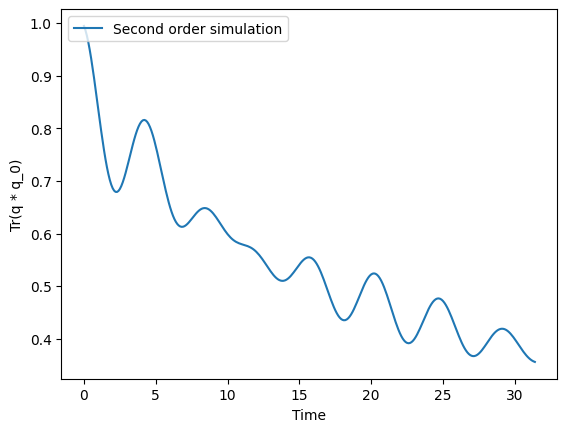

In [24]:
import math
import numpy as np

ancilla = 5  							# Ancillary system size
ancilla_dim = np.power(2, ancilla)
total_system_size = system_size + ancilla 		# Total system size
total_system_size_dim = np.power(2, total_system_size)

# Second order scheme
psi_ancilla = 1
for i in range(ancilla):
    psi_ancilla = np.kron(psi_ancilla, ket_0)

rho_ancilla = Qobj(psi_ancilla.conj().T @ psi_ancilla)

rho = rho_0
second_order_trace_sigmaZ_rho = []
for t in time_vec:
    print('\b\b\b\b\b', t)
    # Extended system, zero initialized ancilla + hamiltonian system
    system = Qobj(tensor(rho_ancilla, rho))
    # First element of taylor approximation, I
    taylor_aprox = Qobj(
        qeye(np.power(2, total_system_size)),
        dims=[[ancilla_dim, system_size_dim], [ancilla_dim, system_size_dim]],
    )
    # Custom size Taylor approximation
    for i in np.arange(1, taylor_aprox_order, 1):
        tmp = H_tilde_second_order(t)
        for _ in np.arange(1, i, 1):
            tmp = tmp @ H_tilde_second_order(t)
        taylor_aprox = taylor_aprox + np.power(-1j * dt, i) / math.factorial(i) * tmp

    left_tmp = taylor_aprox
    rigth_tmp = taylor_aprox.conj().trans()
    evolved_system = left_tmp @ system @ rigth_tmp
    rho = evolved_system.ptrace(1)
    second_order_trace_sigmaZ_rho.append((rho @ rho_0).tr())

plt.figure()
plt.xlabel("Time")
plt.ylabel("Tr(q * q_0)")
plt.plot(time_vec, second_order_trace_sigmaZ_rho, label="Second order simulation")
plt.legend(loc="upper left")

/home/robi/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/robi/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


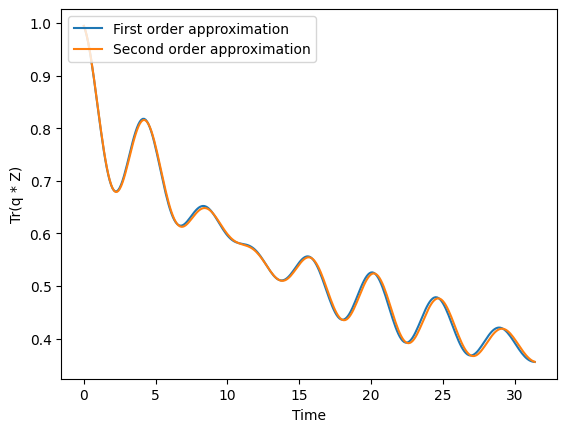

In [27]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Time")
plt.ylabel("Tr(q * Z)")
# plt.plot(time_vec, exact_trace_sigmaZ_rho, label="Exact simulation")
plt.plot(time_vec, first_order_trace_sigmaZ_rho, label="First order approximation")
plt.plot(time_vec, second_order_trace_sigmaZ_rho, label="Second order approximation")
plt.legend(loc="upper left")